In [297]:
#libraries we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date

In [298]:
train = pd.read_csv('train.csv') 
X_test = pd.read_csv('test.csv')

In [299]:
#ID is nothing but a serial number so we can drop that column
train = train.drop(['Id'],axis=1)
X_test = X_test.drop(['Id'],axis=1)

In [300]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [301]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [302]:
train.describe()
#gives a summary of all the continuous variables

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Cleaning Data Set


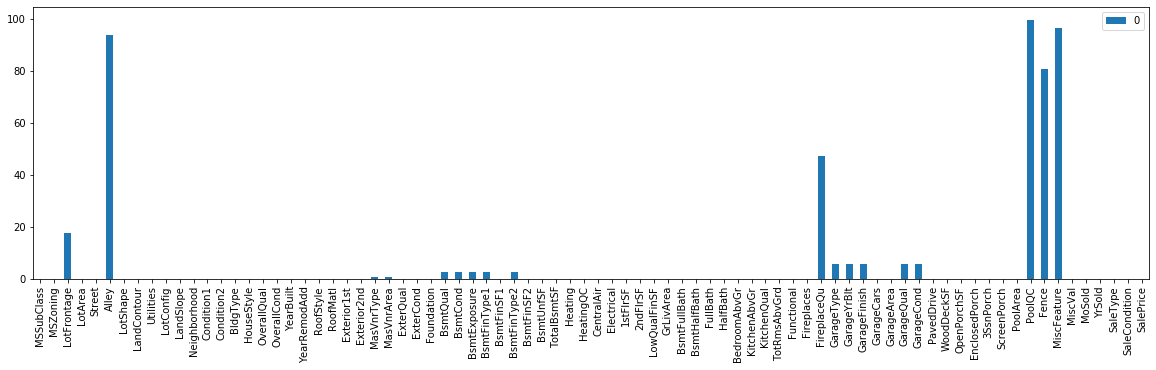

In [303]:
pd.DataFrame(train.isna().sum()*100/train.shape[0]).plot.bar(figsize=(20,5))

* We can see that almost 100% of the values for alley, fence,MiscFeature,PoolQC are na so we can assume that this column dowesn't comtain any information so we can drop them. 
* Also we can see that Fireplace QU has 18% of null values but it is not recommended to drop that column, as this will lead to loss of information
* Replaced null values with NA values in the FireplaceQu column both in test and training set.
### Any missing data less than 1% of the total data set can be removed

In [304]:
train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [305]:
train['FireplaceQu']=train['FireplaceQu'].fillna('NA')
#assuming the same condition for test
X_test['FireplaceQu'].unique()
X_test['FireplaceQu']=X_test['FireplaceQu'].fillna('NA')

In [306]:
train = train.drop(['Alley','MiscFeature','Fence','PoolQC'],axis=1)
#Doing the same for test set
X_test = X_test.drop(['Alley','MiscFeature','Fence','PoolQC'],axis=1)

## Splitting the Dataset

In [307]:
#DIVINE THE TEST AND TRAIN 
X_train=train.drop(['SalePrice'],axis=1)
Y_train=train['SalePrice']

In [308]:
X_test['LotFrontage']=X_test['LotFrontage'].fillna(X_train['LotFrontage'].mean())
X_train['LotFrontage']=X_train['LotFrontage'].fillna(X_train['LotFrontage'].mean())

## A closer look to what else needs to be done. 

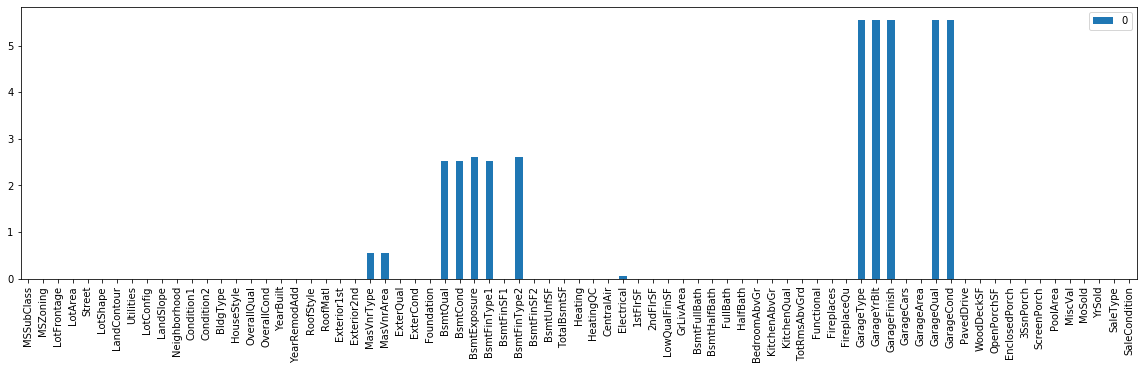

In [309]:
pd.DataFrame(X_train.isna().sum()*100/X_train.shape[0]).plot.bar(figsize=(20,5))

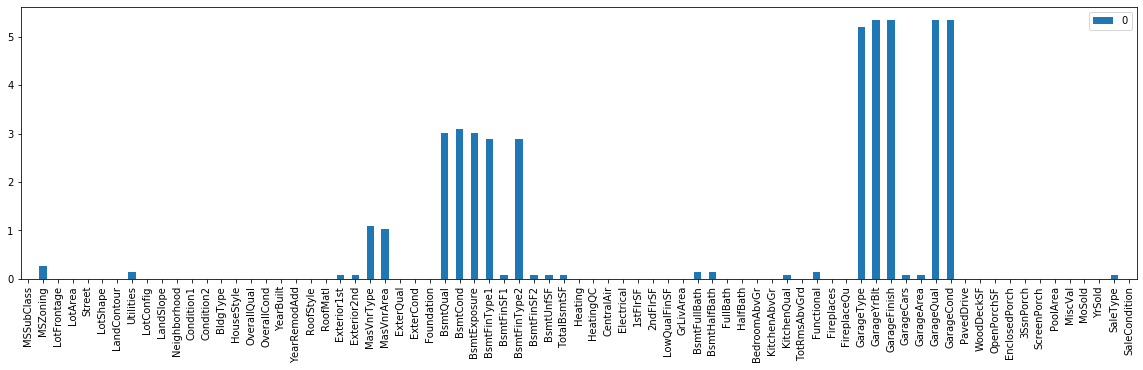

In [310]:
pd.DataFrame(X_test.isna().sum()*100/X_test.shape[0]).plot.bar(figsize=(20,5))

* We can see similare Discrepancies in the test and training set, related to the data collection i.e. NA values

In [311]:
#dropping all the NA values will lead to loss of 10% of test and training data. 
x = X_train.dropna().shape[0]*100/X_train.shape[0]
y = X_test.dropna().shape[0]*100/X_test.shape[0]
print(x,y)

91.64383561643835 90.4043865661412


* dropping all the NA values will lead to loss of 10% of test and training data.
* We will only consider to drop if the reduction is less than 1%

## Converting year built into age

In [312]:
currentYear = datetime.now().year

* Converting a few columns such as Year Built and Year Remod added into the age as per current date. 
* The following columns make no contribution regarding the sales price ,so we can drop it. 

 - MoSold : Month Sold (MM)

 - YrSold: Year Sold (YYYY)

 - SaleType: Type of sale

 - SaleCondition: Condition of sale




In [313]:
X_train['Age_House']=currentYear-X_train['YearBuilt']
X_train['Age_Renovation']=currentYear-X_train['YearRemodAdd']
X_train['Garage_age']=currentYear-X_train['GarageYrBlt']
X_train = X_train.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold','SaleType','SaleCondition'],axis=1)

In [314]:
X_test['Age_House']=currentYear-X_test['YearBuilt']
X_test['Age_Renovation']=currentYear-X_test['YearRemodAdd']
X_test['Garage_age']=currentYear-X_test['GarageYrBlt']
X_test = X_test.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold','SaleType','SaleCondition'],axis=1)

In [315]:
X_train['Age_House'].head()
#X_train['Age_Renovation'].head()

0     17
1     44
2     19
3    105
4     20
Name: Age_House, dtype: int64

In [316]:
X_train.GarageQual.isna().sum()
#X_train.GarageFinish.isna().sum()
#X_train.GarageFinish.isna().sum()

81

In [317]:
X_train['BsmtQual'].isna().sum()
#X_train['BsmtCond'].isna().sum()
#X_train['BsmtExposure'].isna().sum()
#X_train['BsmtFinType1'].isna().sum()

37

* NA must be the houses with no garage as we have the same number of rows as NA where houses have a garage feature
* NA must be the houses with no basement as we have the same number of rows as NA where houses have a garage feature
* Replaced Garage age missing value with the mean of garage age value so we don't loose data; replacing these with the value of house age might lead to to downside effect in the case where houses are new and case where houses are old 


In [318]:
#we can ignore D,E as they belong to a <1% decrease in dataset
A = X_train.GarageType.value_counts().index[0]
B = X_train.Electrical.value_counts().index[0]
C = X_train['Garage_age'].mean
D = X_train['MasVnrArea'].mean
E = X_train.MasVnrType.value_counts().index[0]

X_train['GarageQual']=X_train['GarageQual'].fillna('NA')
X_train['GarageFinish']=X_train['GarageFinish'].fillna('NA')
X_train['GarageCond']=X_train['GarageCond'].fillna('NA')

X_train['GarageType']=X_train['GarageType'].fillna(A)
X_train['Electrical']=X_train['Electrical'].fillna(B)
X_train['Garage_age']=X_train['Garage_age'].fillna(C)
X_train['MasVnrArea']=X_train['MasVnrArea'].fillna(D)
X_train['MasVnrType']=X_train['MasVnrType'].fillna(E)

X_train['BsmtQual']=X_train['BsmtQual'].fillna('NA')
X_train['BsmtCond']=X_train['BsmtCond'].fillna('NA')
X_train['BsmtExposure']=X_train['BsmtExposure'].fillna('NA')
X_train['BsmtFinType1']=X_train['BsmtFinType1'].fillna('NA')
X_train['BsmtFinType2']=X_train['BsmtFinType2'].fillna('NA')

In [319]:
X_train.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

* This is the final step of cleaning the dataset. 

### Applying the same step to the test set so we have clean test set. 

In [320]:
X_test['GarageQual']=X_test['GarageQual'].fillna('NA')
X_test['GarageFinish']=X_test['GarageFinish'].fillna('NA')
X_test['GarageCond']=X_test['GarageCond'].fillna('NA')

X_test['GarageType']=X_test['GarageType'].fillna(A)
X_test['Electrical']=X_test['Electrical'].fillna(B)
X_test['Garage_age']=X_test['Garage_age'].fillna(C)
X_test['MasVnrArea']=X_test['MasVnrArea'].fillna(D)
X_test['MasVnrType']=X_test['MasVnrType'].fillna(E)

X_test['BsmtQual']=X_test['BsmtQual'].fillna('NA')
X_test['BsmtCond']=X_test['BsmtCond'].fillna('NA')
X_test['BsmtExposure']=X_test['BsmtExposure'].fillna('NA')
X_test['BsmtFinType1']=X_test['BsmtFinType1'].fillna('NA')
X_test['BsmtFinType2']=X_test['BsmtFinType2'].fillna('NA')

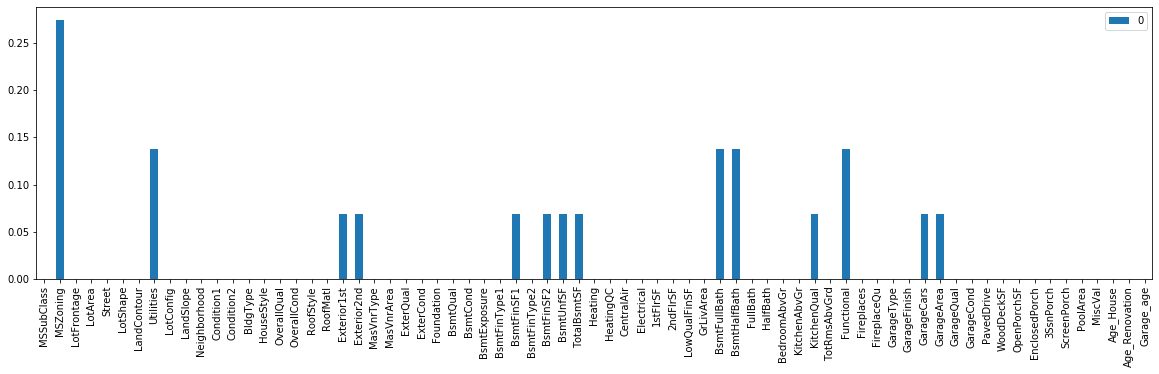

In [321]:
pd.DataFrame(X_test.isna().sum()*100/X_test.shape[0]).plot.bar(figsize=(20,5))

In [322]:
#construction new values to replace the missing values. 
F = X_train.MSZoning.value_counts().index[0]
G = X_train.Utilities.value_counts().index[0]
H = X_train.Exterior1st.value_counts().index[0]
I = X_train.Exterior2nd.value_counts().index[0]
J = X_train['BsmtFinSF1'].mean()
K = X_train['BsmtFinSF2'].mean()
L = X_train['TotalBsmtSF'].mean()
M = X_train.BsmtFullBath.value_counts().index[0]
N = X_train.BsmtHalfBath.value_counts().index[0]
O = X_train.KitchenQual.value_counts().index[0]
P = X_train.Functional.value_counts().index[0]
Q = int(X_train.GarageCars.value_counts().index[0])
R = X_train['GarageArea'].mean()
S = X_train['BsmtUnfSF'].mean()


In [323]:
X_test['MSZoning']=X_test['MSZoning'].fillna(F)
X_test['Utilities']=X_test['Utilities'].fillna(G)
X_test['Exterior1st']=X_test['Exterior1st'].fillna(H)
X_test['Exterior2nd']=X_test['Exterior2nd'].fillna(I)
X_test['BsmtFinSF1']=X_test['BsmtFinSF1'].fillna(J)
X_test['BsmtFinSF2']=X_test['BsmtFinSF2'].fillna(K)
X_test['TotalBsmtSF']=X_test['TotalBsmtSF'].fillna(L)
X_test['BsmtFullBath']=X_test['BsmtFullBath'].fillna(M)
X_test['BsmtHalfBath']=X_test['BsmtHalfBath'].fillna(N)
X_test['KitchenQual']=X_test['KitchenQual'].fillna(O)
X_test['Functional']=X_test['Functional'].fillna(P)
X_test['GarageCars']=X_test['GarageCars'].fillna(Q)
X_test['GarageArea']=X_test['GarageArea'].fillna(R)
X_test['BsmtUnfSF']=X_test['BsmtUnfSF'].fillna(S)



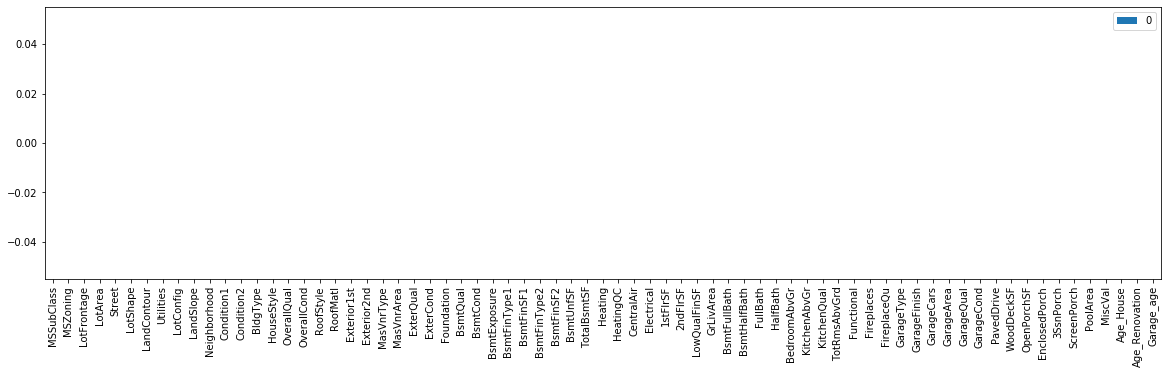

In [324]:
pd.DataFrame(X_train.isna().sum()*100/X_train.shape[0]).plot.bar(figsize=(20,5))

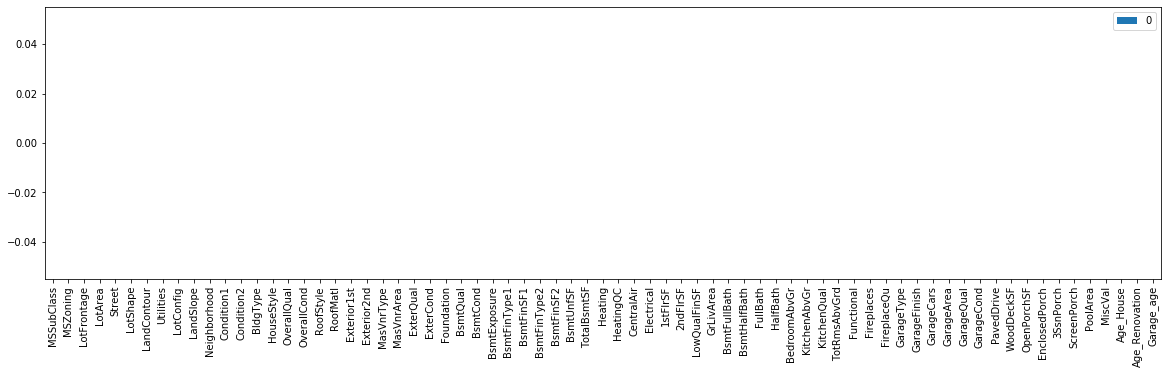

In [325]:
pd.DataFrame(X_test.isna().sum()*100/X_test.shape[0]).plot.bar(figsize=(20,5))

In [326]:
pd.DataFrame(X_train.isna().sum()).sum()

0    0
dtype: int64

In [327]:
pd.DataFrame(X_train.isna().sum()).sum()

0    0
dtype: int64

#### We can see that the test/train set has no null values, we can start EDA and model training. 

# EDA

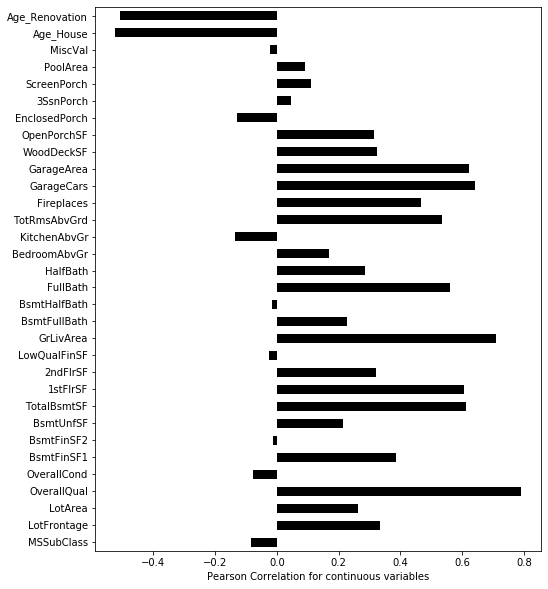

In [328]:
result = pd.concat([X_train, Y_train], axis=1)
Corr = result.corr().iloc[:-1,-1]

fig, ax_ = plt.subplots(figsize=(8, 10))
_ =  Corr.plot(kind='barh', ax=ax_, colormap='gnuplot')
_ = ax_.set_xlabel('Pearson Correlation for continuous variables')